# Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file_path = "./data/airbnb_hw.csv"
df = pd.read_csv(file_path)

In [3]:
print(f"Dataset dimensions: {df.shape}")  # (rows, columns)
print(df.columns)
print(df.head())

Dataset dimensions: (30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartm

The dataset has 30,478 rows and 13 columns with 30,478 total observations. Variables included are: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number Of Reviews, Price, Review Scores Rating

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

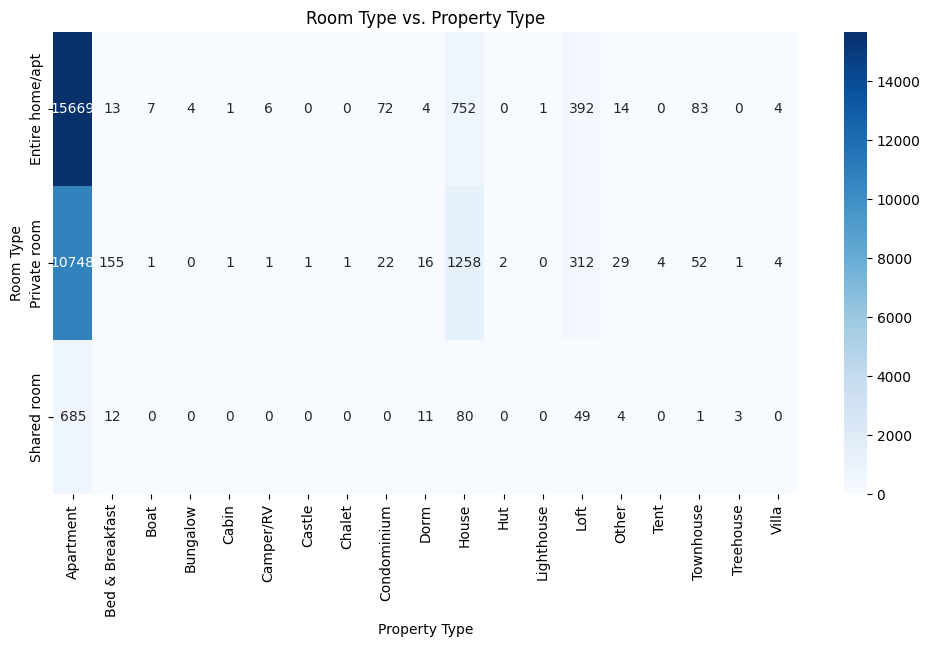

In [4]:
room_property_ct = pd.crosstab(df['Room Type'], df['Property Type'])
print(room_property_ct)

plt.figure(figsize=(12, 6))
sns.heatmap(room_property_ct, annot=True, cmap="Blues", fmt="d")
plt.title("Room Type vs. Property Type")
plt.ylabel("Room Type")
plt.xlabel("Property Type")
plt.show()

The most rentals available are apartments, the least popular room type is shared rooms, and- specifically- for houses, bed & breakfasts, tents, huts, dorms, chalets, castles, and "other" have more popular private rooms than other room types. 

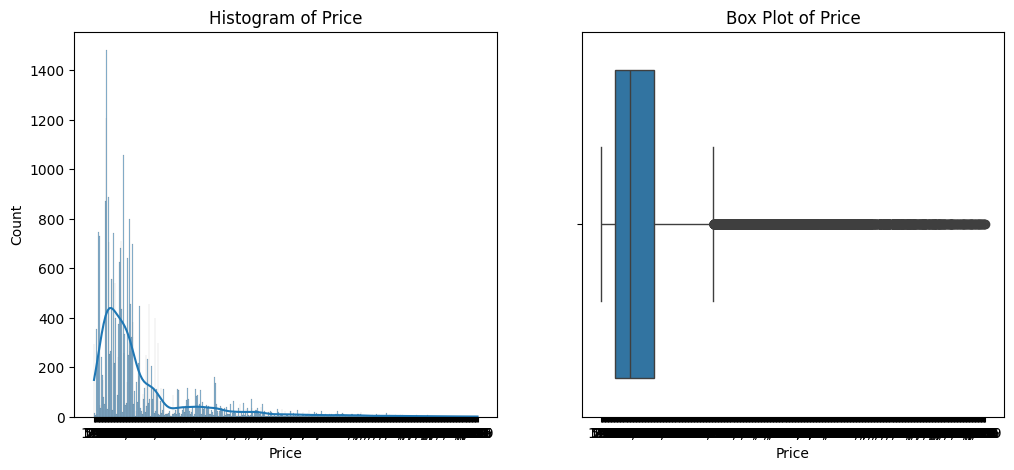

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object


In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=50, kde=True)
plt.xlabel('Price')
plt.title('Histogram of Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')

plt.show()
print(df['Price'].describe())

Prices are right-skewed, with many low values and some extremely high outliers- the box plot helps confirm the presence of outliers.

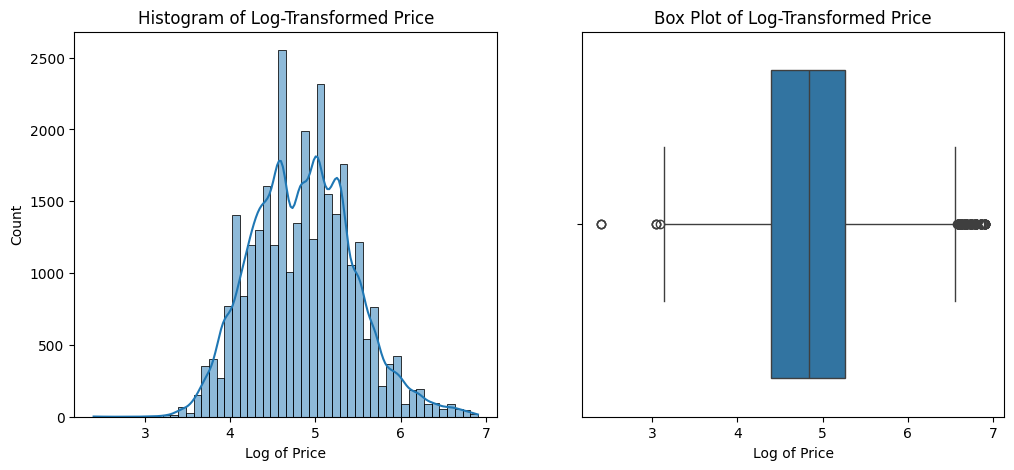

count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


In [7]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['price_log'] = np.log1p(df['Price'])  # Log transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price_log'], bins=50, kde=True)
plt.xlabel('Log of Price')
plt.title('Histogram of Log-Transformed Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price_log'])
plt.xlabel('Log of Price')
plt.title('Box Plot of Log-Transformed Price')

plt.show()
print(df['price_log'].describe())

These values are much more normally distributed, but there do appear to still be outliers. This time, though, both at the far right and far left of the distribution.

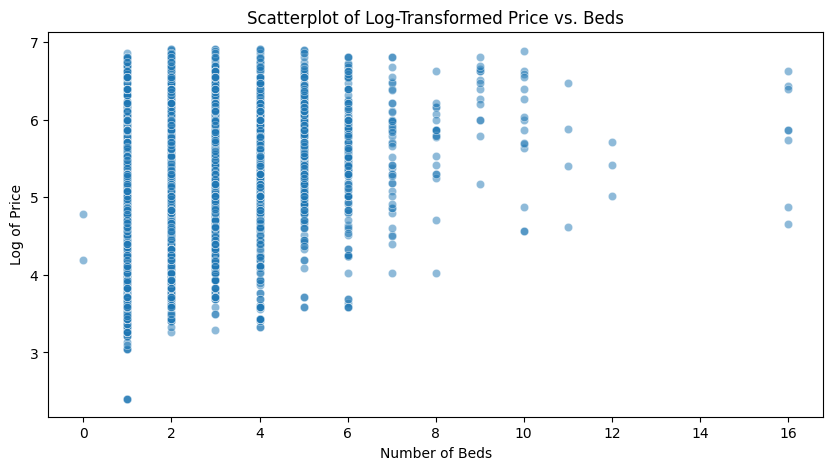

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Beds'], y=df['price_log'], alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.title('Scatterplot of Log-Transformed Price vs. Beds')
plt.show()

It appears that the more beds you have, the higher the average of price_log gets. Though, a lower amount of beds does not necessarily mean a lower price; however, the average itself does appear to be lower.

In [9]:
beds_summary = df.groupby('Beds')['Price'].describe()
print(beds_summary[['mean', 'std', '50%']]) 

            mean         std    50%
Beds                               
0.0    92.000000   38.183766   92.0
1.0   124.757670   75.685752  100.0
2.0   186.702332  115.044205  160.0
3.0   234.928043  142.288189  200.0
4.0   280.554830  175.512312  240.0
5.0   322.000000  190.319415  285.0
6.0   316.313253  201.157585  271.0
7.0   341.377778  220.116631  300.0
8.0   331.850000  155.652202  339.5
9.0   587.142857  208.351721  625.0
10.0  442.200000  263.926992  400.0
11.0  332.250000  236.798613  289.5
12.0  225.000000   75.000000  225.0
16.0  402.250000  235.093143  350.0


As beds increase, the mean and std (generally) increase as well, with some outliers appearing in 9 and 10 compared to 11, 12, and 16 for the mean and median and outliers in 12 for the std compared to 11 and 16. 

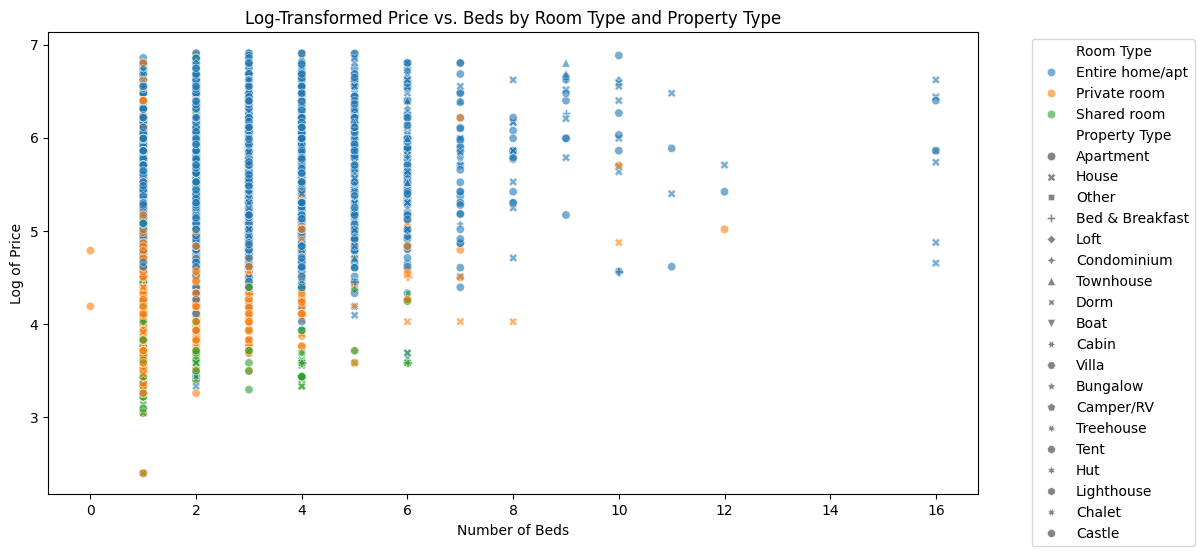

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Beds', y='price_log', hue='Room Type', style='Property Type', alpha=0.6)
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.title('Log-Transformed Price vs. Beds by Room Type and Property Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Entire homes and apartments seem to be the most expensive, and private and shared rooms are notably less expensive, with houses becoming a larger portion of the total number of beds as the number of beds increases, and shared rooms become less of a portion for each number of beds as the number of beds increase. 

In [11]:
room_property_summary = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(room_property_summary[['mean', 'std', '50%']])

                                       mean         std    50%
Room Type       Property Type                                 
Entire home/apt Apartment        200.210161  109.967435  175.0
                Bed & Breakfast  184.538462  119.814172  130.0
                Boat             158.428571   51.110524  150.0
                Bungalow         150.750000   46.464144  160.5
                Cabin            250.000000         NaN  250.0
                Camper/RV        114.333333  107.685963   74.0
                Condominium      281.126761  175.313998  200.0
                Dorm              44.250000   24.060687   33.5
                House            234.554633  159.785974  188.0
                Lighthouse        39.000000         NaN   39.0
                Loft             284.910290  184.515517  220.0
                Other            290.800000  273.526273  177.5
                Townhouse        242.037037  166.755243  189.0
                Villa            206.333333   89.667906

Entire home/apt. have the highest price on average and the boats, bed & breakfasts, and "other" seem to have a higher average across all bed types. "other" across all types seems to have the highest std, and Entire home/apt lofts and condominiums have high std. deviations as well. The median seems to be a more reliable indicator due to the skewness of the data. 

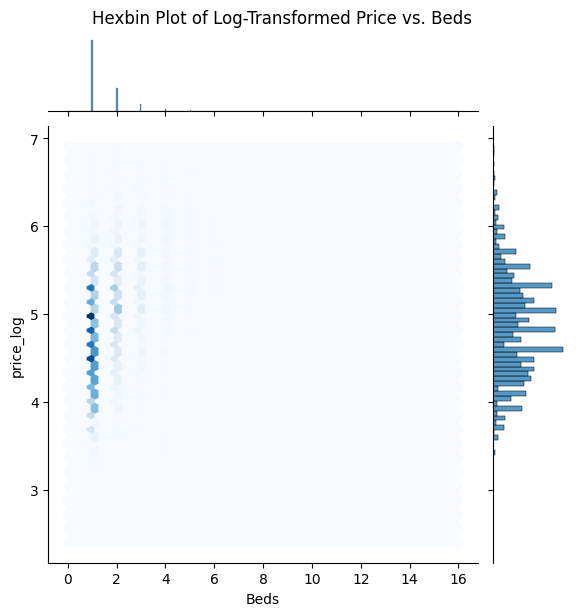

In [12]:
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex', gridsize=50, cmap='Blues')
plt.suptitle('Hexbin Plot of Log-Transformed Price vs. Beds', y=1.02)
plt.show()

The vast majority of the data actually occurs in the 0-3 total beds, which was seen much less in the other graphs. Likely, in earlier observations, the outliers skewed my perceptions for question 5 and 6.